In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude, longitude combinations
lats = np.random.uniform(-90.000, 90.000, size=1500)
longs = np.random.uniform(-180.000, 180.000, size=1500)

lat_lngs = zip(lats,longs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import the citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the city for each latitude/longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, we add it to "cities" list
    if city not in cities:
        cities.append(city)
# Print the length of the cities list to confirm sufficient count
len(cities)

610

In [6]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to store city data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 since we can only call 60 in a minute
    if (i % 50 ==0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint url for city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing record {record_count} of set {set_count} | {city}")
    
    # Increase the record count by 1
    record_count += 1
    
    # Run an API request for each city
    try:
        # Retrieve data from url and set to a variable
        city_weather = requests.get(city_url).json()
        
        # Parse JSON object for specific data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append city information to city_data list
        city_data.append({"city": city.title(), "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, 
                          "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind": city_wind, "Country": city_country,
                         "Date": city_date})
        
    # If an Error is received, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing record 1 of set 1 | notre-dame-du-lac
Processing record 2 of set 1 | cape town
Processing record 3 of set 1 | talnakh
Processing record 4 of set 1 | castro
Processing record 5 of set 1 | vila franca do campo
Processing record 6 of set 1 | puerto ayora
Processing record 7 of set 1 | provideniya
Processing record 8 of set 1 | victoria
Processing record 9 of set 1 | lorengau
Processing record 10 of set 1 | urumqi
Processing record 11 of set 1 | kibala
Processing record 12 of set 1 | santa luzia
Processing record 13 of set 1 | bluff
Processing record 14 of set 1 | mys shmidta
City not found. Skipping...
Processing record 15 of set 1 | hobart
Processing record 16 of set 1 | saint george
Processing record 17 of set 1 | punta arenas
Processing record 18 of set 1 | busselton
Processing record 19 of set 1 | mataura
Processing record 20 of set 1 | ushuaia
Processing record 21 of set 1 | domoni
Processing record 22 of set 1 | 

Processing record 39 of set 4 | marsaxlokk
Processing record 40 of set 4 | mahebourg
Processing record 41 of set 4 | evensk
Processing record 42 of set 4 | porto novo
Processing record 43 of set 4 | pochutla
Processing record 44 of set 4 | longyearbyen
Processing record 45 of set 4 | yellowknife
Processing record 46 of set 4 | bur gabo
City not found. Skipping...
Processing record 47 of set 4 | ornskoldsvik
Processing record 48 of set 4 | souillac
Processing record 49 of set 4 | phan rang
City not found. Skipping...
Processing record 50 of set 4 | ust-barguzin
Processing record 1 of set 5 | necochea
Processing record 2 of set 5 | vaitupu
City not found. Skipping...
Processing record 3 of set 5 | katsuura
Processing record 4 of set 5 | kiruna
Processing record 5 of set 5 | brownsville
Processing record 6 of set 5 | semey
Processing record 7 of set 5 | armacao dos buzios
City not found. Skipping...
Processing record 8 of set 5 | talavera de la reina
Processing record 9 of set 5 | kruisfo

Processing record 25 of set 8 | tailai
Processing record 26 of set 8 | san patricio
Processing record 27 of set 8 | marsa matruh
Processing record 28 of set 8 | perth
Processing record 29 of set 8 | torbay
Processing record 30 of set 8 | lagos
Processing record 31 of set 8 | barmer
Processing record 32 of set 8 | hokitika
Processing record 33 of set 8 | vangaindrano
Processing record 34 of set 8 | elizabeth city
Processing record 35 of set 8 | bloemfontein
Processing record 36 of set 8 | tual
Processing record 37 of set 8 | vostok
Processing record 38 of set 8 | sorland
Processing record 39 of set 8 | lokosovo
Processing record 40 of set 8 | skibbereen
Processing record 41 of set 8 | frontera
Processing record 42 of set 8 | khani
Processing record 43 of set 8 | saleaula
City not found. Skipping...
Processing record 44 of set 8 | nowy sacz
Processing record 45 of set 8 | namibe
Processing record 46 of set 8 | buala
Processing record 47 of set 8 | malmyzh
Processing record 48 of set 8 | 

Processing record 8 of set 12 | jinchang
Processing record 9 of set 12 | tomatlan
Processing record 10 of set 12 | nizhneyansk
City not found. Skipping...
Processing record 11 of set 12 | tagusao
Processing record 12 of set 12 | palana
Processing record 13 of set 12 | abu dhabi
Processing record 14 of set 12 | buta
Processing record 15 of set 12 | noumea
Processing record 16 of set 12 | nibbar
Processing record 17 of set 12 | barsovo
Processing record 18 of set 12 | port macquarie
Processing record 19 of set 12 | tigzirt
Processing record 20 of set 12 | nishihara
Processing record 21 of set 12 | canaries
Processing record 22 of set 12 | palo alto
Processing record 23 of set 12 | riaba
City not found. Skipping...
Processing record 24 of set 12 | minab
Processing record 25 of set 12 | bo phloi
Processing record 26 of set 12 | tiznit
Processing record 27 of set 12 | sisimiut
Processing record 28 of set 12 | beringovskiy
Processing record 29 of set 12 | bjerkvik
Processing record 30 of set

In [10]:
# Create a datframe from the list of dictionaries
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind,Country,Date
0,Notre-Dame-Du-Lac,47.6136,-68.7964,27.88,78,98,9.62,CA,2022-11-23 18:38:21
1,Cape Town,-33.9258,18.4232,65.12,81,40,17.27,ZA,2022-11-23 18:38:22
2,Talnakh,69.4865,88.3972,-29.34,97,26,1.99,RU,2022-11-23 18:38:23
3,Castro,-24.7911,-50.0119,75.18,65,12,5.70,BR,2022-11-23 18:38:23
4,Vila Franca Do Campo,37.7167,-25.4333,61.21,90,100,13.02,PT,2022-11-23 18:38:24
5,Puerto Ayora,-0.7393,-90.3518,78.76,91,77,10.00,EC,2022-11-23 18:38:25
6,Provideniya,64.3833,-173.3000,12.72,73,100,6.42,RU,2022-11-23 18:38:26
7,Victoria,22.2855,114.1577,74.17,93,100,15.99,HK,2022-11-23 18:34:13
8,Lorengau,-2.0226,147.2712,81.79,76,20,8.77,PG,2022-11-23 18:38:26
9,Urumqi,43.8010,87.6005,29.35,93,100,6.71,CN,2022-11-23 18:34:01


In [11]:
new_column_order = ["city", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,city,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind
0,Notre-Dame-Du-Lac,CA,2022-11-23 18:38:21,47.6136,-68.7964,27.88,78,98,9.62
1,Cape Town,ZA,2022-11-23 18:38:22,-33.9258,18.4232,65.12,81,40,17.27
2,Talnakh,RU,2022-11-23 18:38:23,69.4865,88.3972,-29.34,97,26,1.99
3,Castro,BR,2022-11-23 18:38:23,-24.7911,-50.0119,75.18,65,12,5.70
4,Vila Franca Do Campo,PT,2022-11-23 18:38:24,37.7167,-25.4333,61.21,90,100,13.02
5,Puerto Ayora,EC,2022-11-23 18:38:25,-0.7393,-90.3518,78.76,91,77,10.00
6,Provideniya,RU,2022-11-23 18:38:26,64.3833,-173.3000,12.72,73,100,6.42
7,Victoria,HK,2022-11-23 18:34:13,22.2855,114.1577,74.17,93,100,15.99
8,Lorengau,PG,2022-11-23 18:38:26,-2.0226,147.2712,81.79,76,20,8.77
9,Urumqi,CN,2022-11-23 18:34:01,43.8010,87.6005,29.35,93,100,6.71


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export data to csv file
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [13]:
# Parse dataframe for relevant data for plot
lats = city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind"]

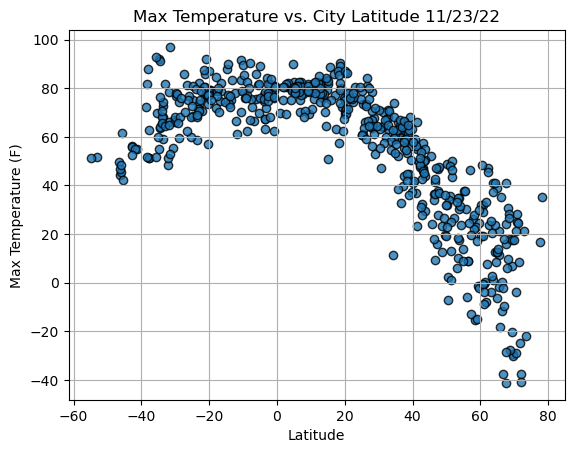

In [14]:
# Build scatter plot
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker = 'o',
            alpha=0.8, label='Cities')

# Add other plot elements
plt.title('Max Temperature vs. City Latitude ' + time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

plt.show()

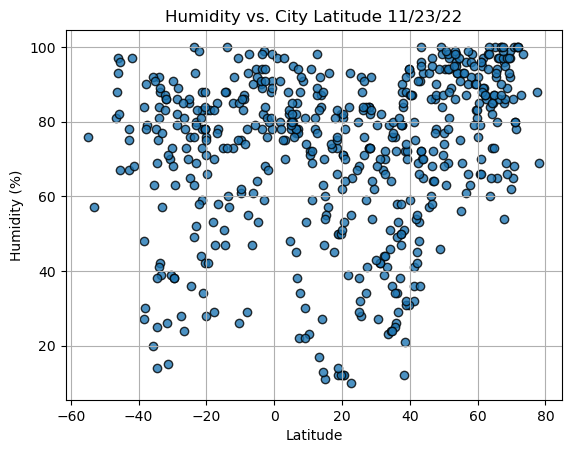

In [15]:
# Build scatter plot
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker = 'o',
            alpha=0.8, label='Cities')

# Add other plot elements
plt.title('Humidity vs. City Latitude ' + time.strftime("%x"))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

plt.show()

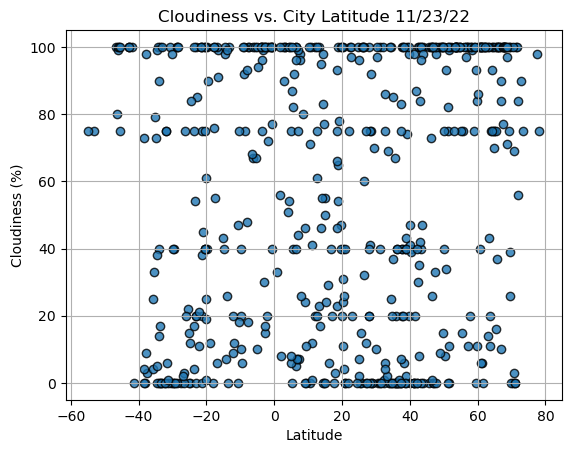

In [16]:
# Build scatter plot
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker = 'o',
            alpha=0.8, label='Cities')

# Add other plot elements
plt.title('Cloudiness vs. City Latitude ' + time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

plt.show()

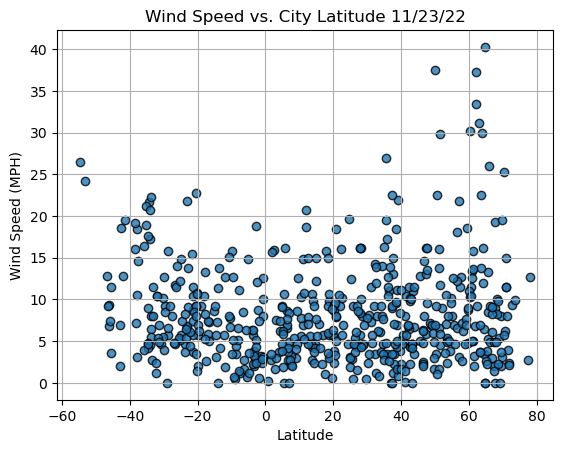

In [17]:
# Build scatter plot
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker = 'o',
            alpha=0.8, label='Cities')

# Add other plot elements
plt.title('Wind Speed vs. City Latitude ' + time.strftime("%x"))
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinate):

    # Run regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate regression y-values
    regress_values = slope*x_values+intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and graph the line of regression
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinate, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

city                       Hobart
Country                        AU
Date          2022-11-23 18:36:52
Lat                      -42.8794
Lng                      147.3294
Max Temp                    56.26
Humidity                       78
Cloudiness                    100
Wind                         6.91
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0]
northern_hemi_df.head()

,city,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind
0,Notre-Dame-Du-Lac,CA,2022-11-23 18:38:21,47.6136,-68.7964,27.88,78,98,9.62
2,Talnakh,RU,2022-11-23 18:38:23,69.4865,88.3972,-29.34,97,26,1.99
4,Vila Franca Do Campo,PT,2022-11-23 18:38:24,37.7167,-25.4333,61.21,90,100,13.02
6,Provideniya,RU,2022-11-23 18:38:26,64.3833,-173.3000,12.72,73,100,6.42
7,Victoria,HK,2022-11-23 18:34:13,22.2855,114.1577,74.17,93,100,15.99


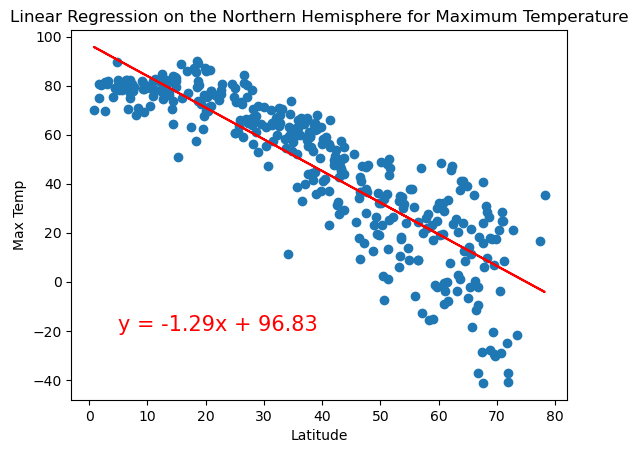

In [21]:
# Perform linear regression on the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                      'Max Temp',(5,-20))

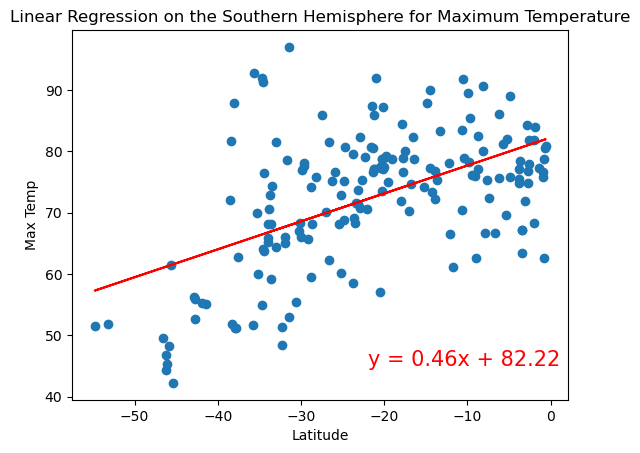

In [22]:
# Perform linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                      'Max Temp',(-22,45))

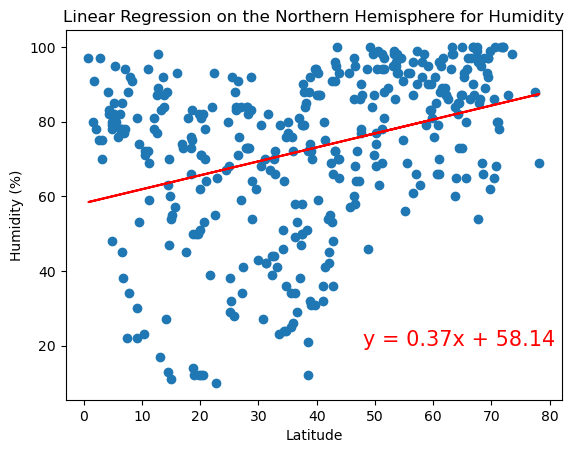

In [23]:
# Perform linear regression on the humidity in the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Humidity',
                      'Humidity (%)',(48,20))

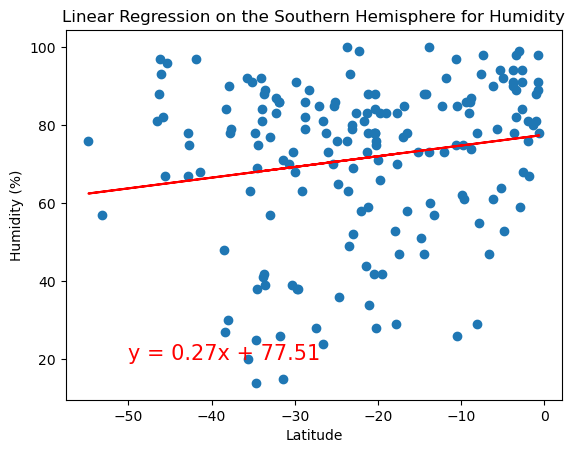

In [24]:
# Perform linear regression on the humidity in the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Humidity',
                      'Humidity (%)',(-50,20))

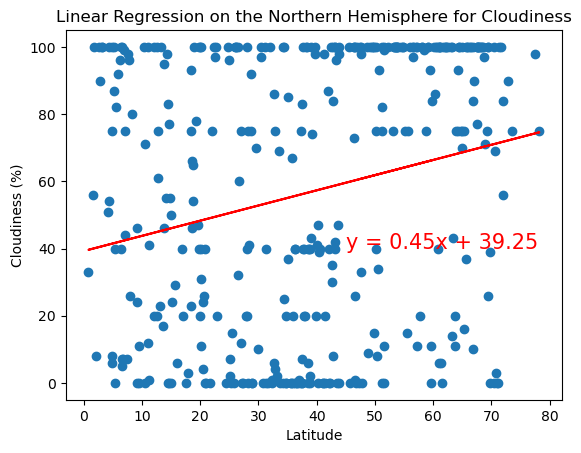

In [25]:
# Perform linear regression on the cloudiness in the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Cloudiness',
                      'Cloudiness (%)',(45,40))

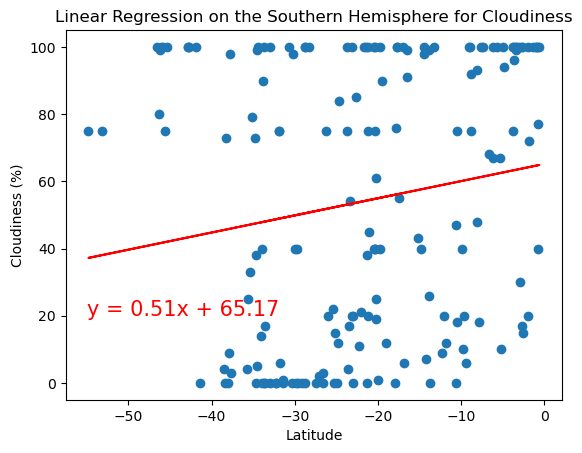

In [26]:
# Perform linear regression on the cloudiness in the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Cloudiness',
                      'Cloudiness (%)',(-55,20))

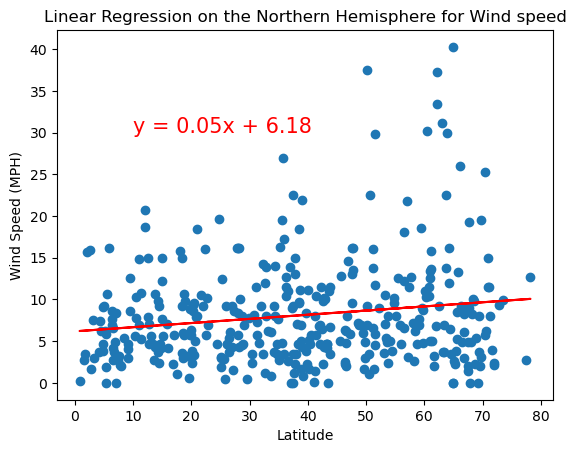

In [27]:
# Perform linear regression on the wind in the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind speed',
                      'Wind Speed (MPH)',(10,30))

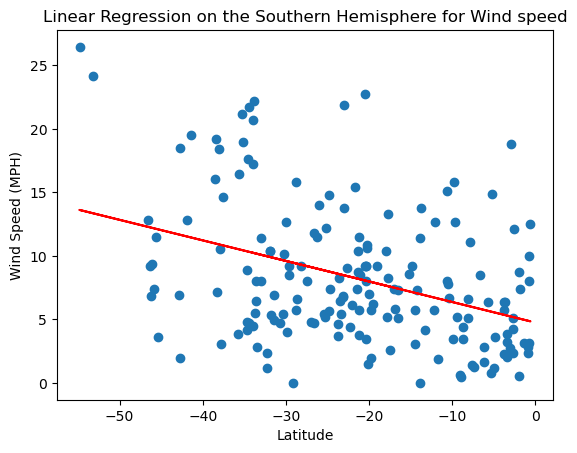

In [28]:
# Perform linear regression on the wind in the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind speed',
                      'Wind Speed (MPH)',(-50,30))